In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.4)


In [ ]:
from fastai import *
from fastai.vision.all import * 

In [ ]:
dir = "/content/drive/MyDrive/Spectrograms_Data3"
path = Path(dir)

In [ ]:
fnames = get_image_files(path)

In [ ]:
len(fnames)

713

In [ ]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42))

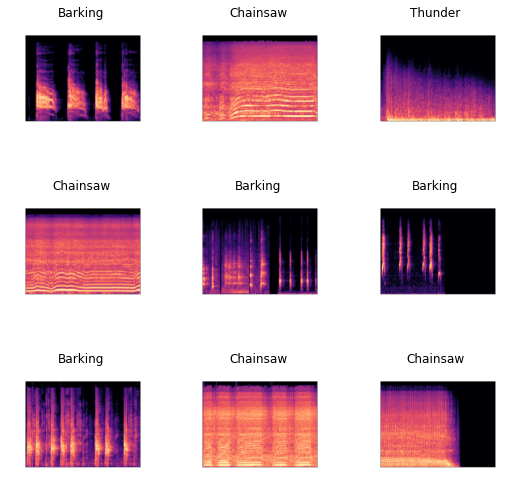

In [ ]:
dls = dls.dataloaders(path)
dls.show_batch()

In [ ]:
dls.vocab,len(dls.vocab)

(['Barking', 'Chainsaw', 'Rain', 'Thunder', 'Vacuum_Cleaner'], 5)

In [ ]:
learn = cnn_learner(dls,resnet50,metrics = accuracy)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


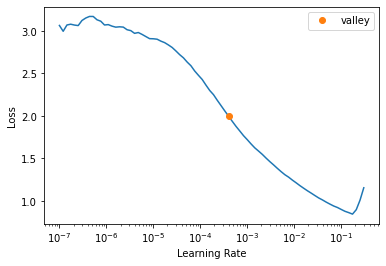

In [ ]:
lr_finder = learn.lr_find()

In [ ]:
lr_finder

SuggestedLRs(valley=tensor(0.0004))

In [ ]:
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.113362,0.721773,0.788732,00:09
1,0.556370,0.298431,0.943662,00:08
2,0.349806,0.115436,0.978873,00:08
3,0.246741,0.093961,0.978873,00:08
4,0.182281,0.091488,0.978873,00:08


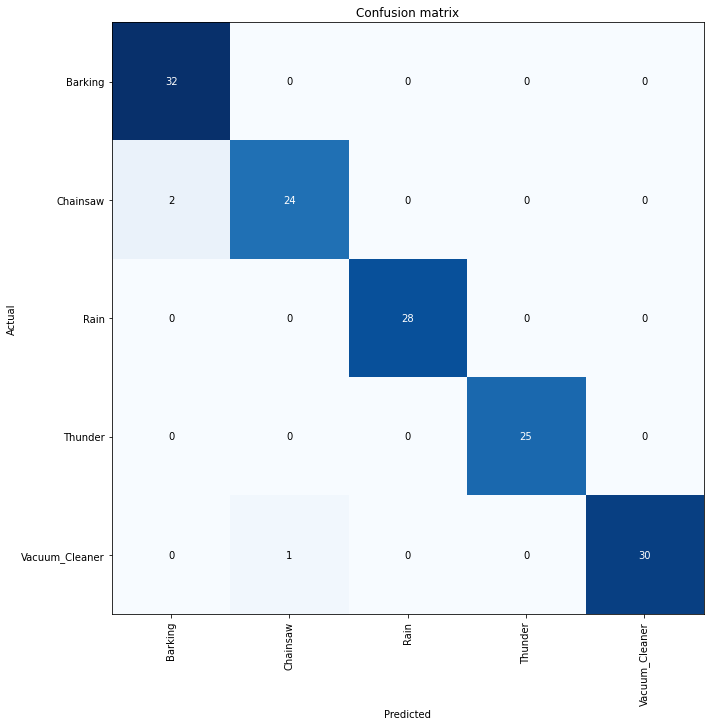

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (10,10))

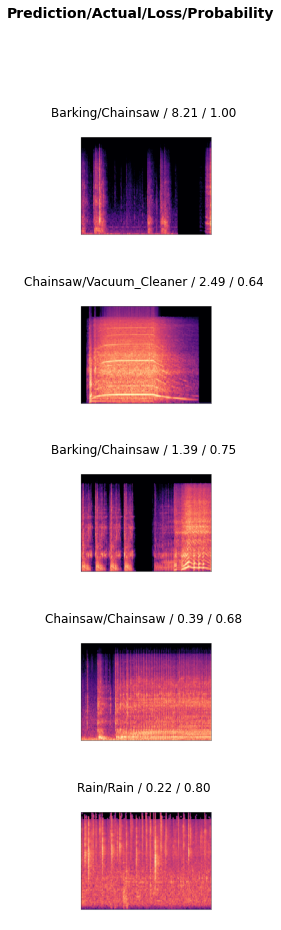

In [ ]:
interp.plot_top_losses(5,nrows = 5)

In [ ]:
learn.export(fname = "fastai2esc50_accuracy_new_data3.pkl",pickle_module=pickle,pickle_protocol=2)

In [ ]:
learn_inf = load_learner('/content/fastai2esc50_accuracy_new_data3.pkl')

In [23]:
learn.predict("/content/chainsaw.png")

('Chainsaw',
 tensor(1),
 tensor([5.4343e-02, 9.2736e-01, 3.4737e-05, 8.2215e-03, 1.0041e-02]))

In [ ]:
learn.predict("/content/0_fortest_50dpi.png")

('Barking',
 tensor(0),
 tensor([9.9295e-01, 6.9451e-03, 2.2501e-08, 1.0808e-04, 4.4115e-08]))

In [25]:
learn.predict("/content/rain-03_test_50dpi.png")

('Rain',
 tensor(2),
 tensor([9.2611e-07, 2.9152e-07, 1.0000e+00, 7.2497e-07, 2.2557e-06]))

In [27]:
learn.predict("/content/thunder_test_50dpi.png")

('Thunder',
 tensor(3),
 tensor([1.4050e-01, 9.7237e-04, 1.2093e-02, 8.4642e-01, 1.4693e-05]))

In [21]:
learn.predict("/content/0_test_50dpi.png")

('Vacuum_Cleaner',
 tensor(4),
 tensor([1.7268e-02, 9.0991e-04, 7.9445e-05, 1.0717e-05, 9.8173e-01]))

thunder_test


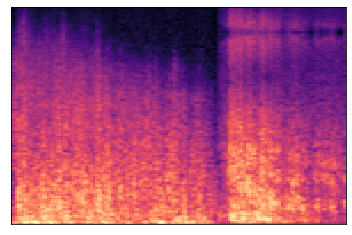

In [26]:
import librosa
import librosa.display
def precompute_spectrograms(path = "./", dpi=50):
    
    value = "thunder.wav"
    i = value.split(".")[0]
    filename_new = str(i)+ "_" + "test"
    print(filename_new)
    file = path + "/" + value
    audio_tensor, sr = librosa.load(file, sr=None)
    spectrogram = librosa.feature.melspectrogram(audio_tensor, sr=sr)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    librosa.display.specshow(log_spectrogram, sr=sr)
    plt.gcf().savefig("{}_{}dpi.png".format("./"+filename_new,dpi), dpi=dpi)
    
precompute_spectrograms()
